# 09-3 LSTM과 GRU 셀

## LSTM 신경망 훈련하기

### LSTM 신경망

In [1]:
# IMDB 리뷰 데이터를 로드하고 훈련 세트와 검증 세트 나누기
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
# 각 샘플의 길이를 100에 맞추기
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
# LSTM 셀을 사용한 순환층
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 모델 컴파일 및 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 9ms/step - loss: 0.6922 - accuracy: 0.5396 - val_loss: 0.6905 - val_accuracy: 0.6118
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6861 - accuracy: 0.5934 - val_loss: 0.6735 - val_accuracy: 0.5970
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6518 - accuracy: 0.6594 - val_loss: 0.6259 - val_accuracy: 0.7266
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6041 - accuracy: 0.7374 - val_loss: 0.5889 - val_accuracy: 0.7428
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5755 - accuracy: 0.7546 - val_loss: 0.5707 - val_accuracy: 0.7498
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5533 - accuracy: 0.7655 - val_loss: 0.5512 - val_accuracy: 0.7594
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5330 - accuracy: 0.7713 - val_loss: 0.5309 - val_accuracy: 0.771

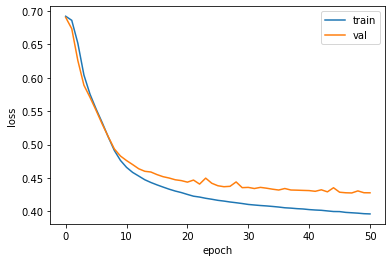

In [6]:
# 훈련 손실과 검증 손실 그래프
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환층에 드롭아웃 적용하기

### 드롭아웃 적용하기

In [7]:
# dropout 매개변수로 드롭아웃 30% 적용
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
# 모델 컴파일 및 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 9ms/step - loss: 0.6927 - accuracy: 0.5236 - val_loss: 0.6918 - val_accuracy: 0.5830
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6907 - accuracy: 0.5907 - val_loss: 0.6889 - val_accuracy: 0.6356
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6856 - accuracy: 0.6366 - val_loss: 0.6808 - val_accuracy: 0.6640
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6676 - accuracy: 0.6716 - val_loss: 0.6415 - val_accuracy: 0.7008
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6050 - accuracy: 0.7117 - val_loss: 0.5797 - val_accuracy: 0.7288
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5710 - accuracy: 0.7327 - val_loss: 0.5558 - val_accuracy: 0.7452
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5485 - accuracy: 0.7497 - val_loss: 0.5383 - val_accuracy: 0.7554

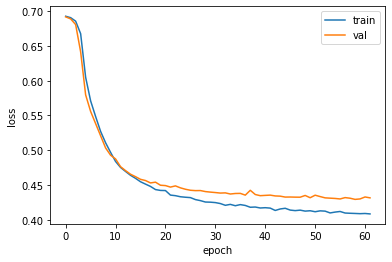

In [9]:
# 훈련 손실과 검증 손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 2개의 층을 연결하기

### 2개의 층을 연결하기

In [10]:
# 순환층 2개 연결
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True)) # return_sequences=True 적용
model3.add(keras.layers.LSTM(8, dropout=0.3)) # 마지막 순환층
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [11]:
# 모델 구조
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 모델 컴파일 및 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 15ms/step - loss: 0.6926 - accuracy: 0.5314 - val_loss: 0.6921 - val_accuracy: 0.5654
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6901 - accuracy: 0.5964 - val_loss: 0.6878 - val_accuracy: 0.6462
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6803 - accuracy: 0.6514 - val_loss: 0.6699 - val_accuracy: 0.6770
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6362 - accuracy: 0.6849 - val_loss: 0.5885 - val_accuracy: 0.7170
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5485 - accuracy: 0.7348 - val_loss: 0.5248 - val_accuracy: 0.7416
Epoch 6/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5169 - accuracy: 0.7516 - val_loss: 0.5016 - val_accuracy: 0.7600
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.4968 - accuracy: 0.7665 - val_loss: 0.4853 - val_accuracy:

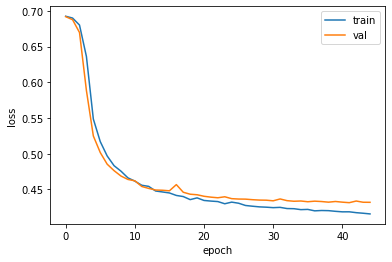

In [14]:
# 훈련 손실과 검증 손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU 신경망 훈련하기

### GRU 신경망

In [15]:
# GRU 셀을 사용한 순환층
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [16]:
# 모델 구조
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 모델 컴파일 및 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 4s 9ms/step - loss: 0.6924 - accuracy: 0.5292 - val_loss: 0.6915 - val_accuracy: 0.5390
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6895 - accuracy: 0.5888 - val_loss: 0.6879 - val_accuracy: 0.6058
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6844 - accuracy: 0.6258 - val_loss: 0.6817 - val_accuracy: 0.6252
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6749 - accuracy: 0.6416 - val_loss: 0.6697 - val_accuracy: 0.6440
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6575 - accuracy: 0.6654 - val_loss: 0.6470 - val_accuracy: 0.6730
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6185 - accuracy: 0.6977 - val_loss: 0.5910 - val_accuracy: 0.7134
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5466 - accuracy: 0.7414 - val_loss: 0.5293 - val_accuracy: 0.7492

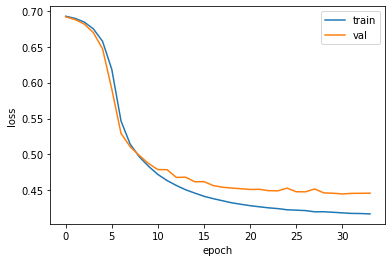

In [18]:
# 훈련 손실과 검증 손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [19]:
# 테스트 세트에 대한 성능 확인
# 테스트 세트를 훈련 세트와 동일한 방식으로 변환한 후 
# best-gru-model.h5 파일을 읽고 evaluate() 메소드로 테스트 세트에서 성능을 계산
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 5s 5ms/step - loss: 0.4244 - accuracy: 0.8014


[0.4244369566440582, 0.8014400005340576]